In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据

In [2]:
combats = pd.read_csv('data/combats.csv')
pokemon = pd.read_csv('data/pokemon.csv')
tests = pd.read_csv('data/tests.csv')

# 数据观测与预处理

In [3]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
pokemon.head(100)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [5]:
tests.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


# 发现有一个名字是空，不过也没事，type2有空值，需要填满

In [6]:
type_cols=["Name","Type 1","Type 2"]
print("There are %d combine types" %(len(pokemon[type_cols].drop_duplicates())))
pokemon.isnull().sum()


There are 800 combine types


#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

# 查看对战情况

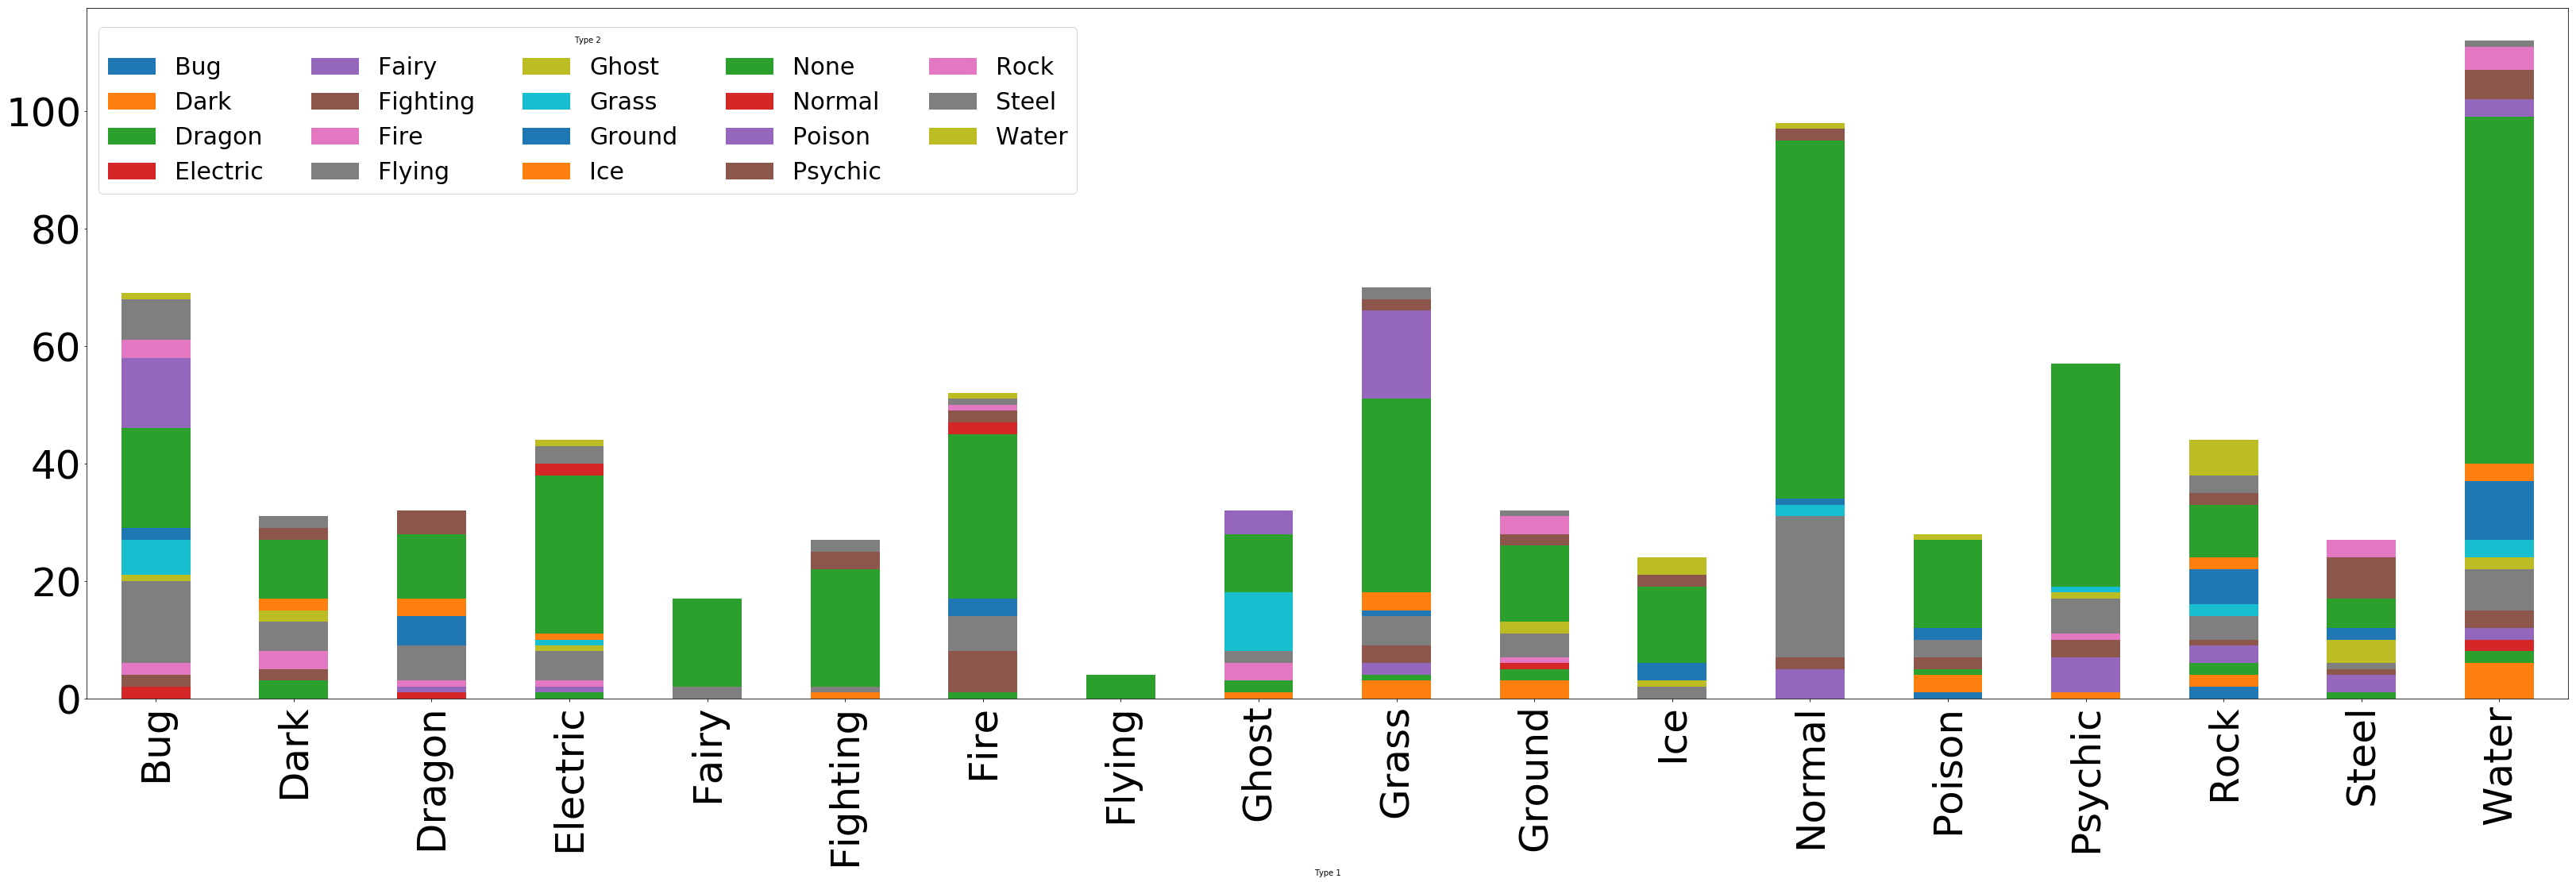

In [7]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("None");
type_cross = pd.crosstab(pokemon["Type 1"],pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(56,16),fontsize=50)
plt.legend(bbox_to_anchor=(0, 0.99), loc='upper left', ncol=5, fontsize=30, title="Type 2")
plt.show()

# 把需要直接换成名字,方便观察,其实不换也行

In [8]:
names_dict=dict(zip(pokemon['#'],pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


# 查看所有精灵的战力分布情况

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


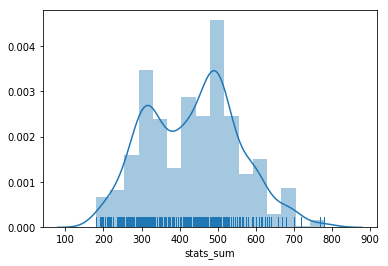

In [9]:
pokemon["stats_sum"]=pokemon["HP"]+pokemon["Attack"]+pokemon["Defense"]+pokemon["Sp. Atk"]+pokemon["Sp. Def"]+pokemon["Speed"]
import matplotlib.pyplot as plt
import seaborn as sns

print(pokemon["stats_sum"].describe())
sns.distplot(pokemon["stats_sum"],kde=True, rug=True)
plt.show()

# 训练集中两只精灵战力差异的情况

count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64


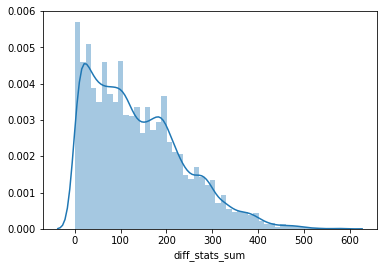

In [10]:
stats_sum_dict = dict(zip(pokemon['#'],pokemon['stats_sum']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_stats_sum = combats[cols].replace(stats_sum_dict)
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"])
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

# 检视胜利和失败精灵的差异，这里应该会涉及到属性克制还有谁先攻击的问题（因为是回合制游戏），其中胜利方偏向于有更高的属性，但是属性弱势方还是有大概率会获胜

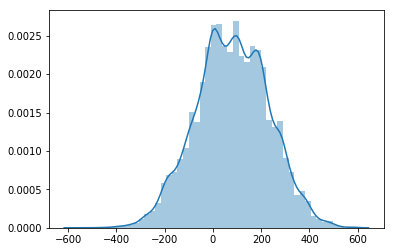

In [11]:
combats_stats_sum["Loser"] = combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"]  else x["Second_pokemon"], axis = 1)
differ_win_lose_stats=combats_stats_sum["Winner"]-combats_stats_sum["Loser"]
sns.distplot(differ_win_lose_stats)
plt.show()

In [12]:
combats_stats_sum.head()

,First_pokemon,Second_pokemon,Winner,Loser
0,300,340,340,300
1,580,580,580,580
2,405,485,485,405
3,250,485,485,250
4,495,505,495,505


# 有5716例是属性弱势方获胜的1

In [13]:
stats_sum_dict_re = dict(zip(pokemon['stats_sum'], pokemon['#']))
combats_stats_sum["diff"] = differ_win_lose_stats
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
surpassing_id = surpassing_stats_sum[cols].replace(stats_sum_dict_re)
surpassing_name = surpassing_id[cols].replace(names_dict)
surpassing_name = surpassing_name.join(combats_stats_sum["diff"])

In [14]:
surpassing_name.shape

(5716, 4)

In [15]:
surpassing_name.sort_values(by='diff')  

,First_pokemon,Second_pokemon,Winner,diff
5861,Mega Rayquaza,Cleffa,Cleffa,-562
2480,Mega Rayquaza,Cleffa,Cleffa,-562
41824,Shedinja,Mega Rayquaza,Shedinja,-544
3506,Mega Rayquaza,Inkay,Inkay,-492
20527,Arceus,Shedinja,Shedinja,-484
1878,Mega Diancie,Cleffa,Cleffa,-482
32941,Hoopa Unbound,Cleffa,Cleffa,-462
44639,Hoopa Unbound,Happiny,Happiny,-460
30248,Mega Diancie,Rattata,Rattata,-447
913,Pumpkaboo Super Size,Mega Rayquaza,Pumpkaboo Super Size,-445


# 观察一下 差距最大的两只精灵 的情况 ，Cleffa的属性差了很多，这应该是由于属性克制的关系，妖精系完克龙系

In [16]:
pokemon[pokemon['Name']=='Mega Rayquaza']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780


In [17]:
pokemon[pokemon['Name']=='Cleffa']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum
187,188,Cleffa,Fairy,None,50,25,28,45,55,15,2,False,218


# 查看第一次攻击是否会成为决定胜负的关键因素，对比之后差异性不大，可以忽略

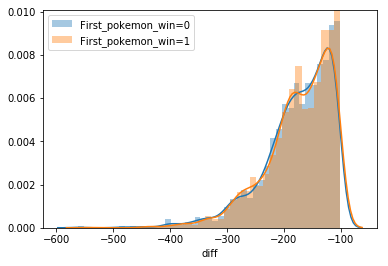

In [18]:
combats_stats_sum["First_Win"] =  combats_stats_sum.apply(lambda x: 1 if x["First_pokemon"] ==  x["Winner"] else 0, axis = 1)
surpassing_stats_sum = combats_stats_sum[combats_stats_sum["diff"] < -100]
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==0]["diff"], label="First_pokemon_win=0")
sns.distplot(surpassing_stats_sum[surpassing_stats_sum["First_Win"]==1]["diff"], label="First_pokemon_win=1")
plt.legend()
plt.show()

# 创建属性克制表，列是供给方，行是防守方，参照http://www.gamersky.com/handbook/201612/841855.shtml

In [19]:
type_relation = pd.read_csv('data/type_mix.csv')
type_relation.index=type_relation["Unnamed: 0"]
type_relation=type_relation.drop(["Unnamed: 0"],axis=1)
type_relation.index.name=""
type_relation

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
,,,,,,,,,,,,,,,,,,
Bug,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Dark,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5
Electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Fairy,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0
Fighting,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
Fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Flying,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,0.5,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Ghost,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0


# 综上所述，得出影响胜负的主要因素是各项属性值和精灵属性克制关系

# 创建训练集，需要统筹战斗时第一个精灵和第二个精灵的属性和属性克制关系

In [20]:
train = combats_name.copy()

In [21]:
train

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar
5,Joltik,Aegislash Shield Forme,Joltik
6,Natu,Jynx,Jynx
7,Machop,Giratina Altered Forme,Giratina Altered Forme
8,Pineco,Clauncher,Clauncher
9,Wingull,Pikachu,Pikachu


# 加入标签，第一个赢的为1，否则为0

In [22]:
train['sign'] =combats_name.apply(lambda x: 1 if x["First_pokemon"] ==  x["Winner"] else 0, axis = 1)

# 读取训练数据，这里使用numbers的vlook函数，感觉可能excel会比较快

In [23]:
train_data = pd.read_csv('data/train.csv')

In [24]:
train_data.head()

,First_pokemon,Second_pokemon,fir_hp,fir_attack,fir_defense,fir_spatk,fir_spdef,fir_speed,sec_hp,sec_attack,sec_defense,sec_spatk,sec_spdef,sec_speed
0,266,298,50,64,50,45,50,41,70,70,40,60,40,60
1,702,701,91,90,72,90,129,108,91,129,90,72,90,108
2,191,668,55,40,85,80,105,40,75,75,75,125,95,40
3,237,683,40,40,40,70,40,20,77,120,90,60,90,48
4,151,231,70,60,125,115,70,55,20,10,230,10,230,5


# 定义一个计算对战中克制关系的函数

In [25]:
def cal_rela(data):
    r1=r2=r3=r4=1
    #print(data['fir_type1'])
    fir_type1 = data['fir_type1']
    fir_type2 = data['fir_type2']
    sec_type1 = data['sec_type1']
    sec_type2 = data['sec_type2']
    
    r1 = type_relation[fir_type1][sec_type1]
    if(sec_type2 != 'None'):
        r2 = type_relation[fir_type1][sec_type2]
    if(fir_type2 != 'None'):
        r3 = type_relation[fir_type2][sec_type1]
    if(fir_type2 != 'None' and sec_type2 != 'None'):
        r4 = type_relation[fir_type2][sec_type2]
    
    return r1*r2*r3*r4

# 最终规范一下训练集

In [26]:
type1_dict = dict(zip(pokemon['#'],pokemon['Type 1']))
type2_dict = dict(zip(pokemon['#'],pokemon['Type 2']))

combats_type = combats.copy()
combats_type['fir_type1'] = combats['First_pokemon'].replace(type1_dict)
combats_type['fir_type2'] = combats['First_pokemon'].replace(type2_dict)

combats_type['sec_type1'] = combats['Second_pokemon'].replace(type1_dict)
combats_type['sec_type2'] = combats['Second_pokemon'].replace(type2_dict)

In [27]:
combats_type['rela'] = combats_type.apply(lambda x:cal_rela(x),axis=1)

In [28]:
train_data['rela'] = combats_type['rela']

In [29]:
train_data['sign'] = combats.apply(lambda x:1 if x["First_pokemon"] ==  x["Winner"] else 0,axis=1)

In [30]:
train_data = train_data.drop(["First_pokemon","Second_pokemon"],axis = 1)

In [31]:
train_data
train_y = train_data['sign']
train_x = train_data.drop(['sign'],axis=1)

# 使用支持向量机分类

In [32]:
from sklearn.svm import SVC
SVC1 = SVC().fit(train_x, train_y)

In [33]:
from sklearn.metrics import accuracy_score
pre=SVC1.predict(train_x)
accuracy_score(pre, train_y)

0.99990000000000001